# CHAT-GPT Sentiment Analysis

In [1]:
# Importing the libraries
import pandas as pd
import re
import spacy
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score

Loading data

In [2]:
# Loading data and reading data
df = pd.read_csv(r'C:\Users\FILI DANI\Downloads\archive (11)\file.csv')
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


Data cleaning

In [3]:
# Drop the Unamed: 0 column
df = df[['tweets','labels']]

# Check for missing values
print(df.isnull().sum())

# Check for empty tweets
blancks = []
for index, tweets, labels in df.itertuples():
    if tweets.isspace():
        blancks.append(index)
print(blancks)

tweets    0
labels    0
dtype: int64
[]


Cleaning texts

In [4]:
# Remove links
def remove_links(text):
    new_text = re.sub(r'https[s]?://\S+','',text)
    return new_text
df['tweets'] = df['tweets'].apply(remove_links)

# Remove punctuations
def remove_punctuations(text):
    new_text = re.sub(r'[^\w\s]','',text)
    return new_text
df['tweets'] = df['tweets'].apply(remove_punctuations)

# Remove combinations of numbers and characters
def remove_combinations_of_numbers_and_characters(text):
    new_text = re.sub(r'\d+','',text)
    return new_text
df['tweets'] = df['tweets'].apply(remove_combinations_of_numbers_and_characters)

# Applying lemmatization
nlp = spacy.load('en_core_web_sm')
def lemmatization(text):
    doc = nlp(text)
    lemma_words = [word.lemma_ for word in doc]
    new_sentence = " ".join(lemma_words)
    return new_sentence
df['tweets'] = df['tweets'].apply(lemmatization)

Visualizing the dataset

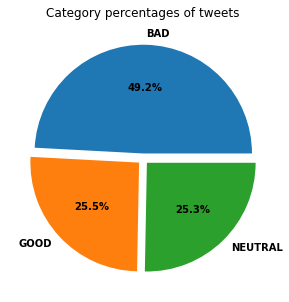

In [5]:
# Pie plot of labels column
fig , ax = plt.subplots(figsize=(5,5))
ax.pie(df['labels'].value_counts(),explode=(0.05,0.05,0.05),
       labels=['BAD','GOOD','NEUTRAL'],autopct='%1.1f%%',
       textprops={'fontweight': 'bold'})
ax.set_title('Category percentages of tweets')
plt.show()

C:\Users\FILI DANI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


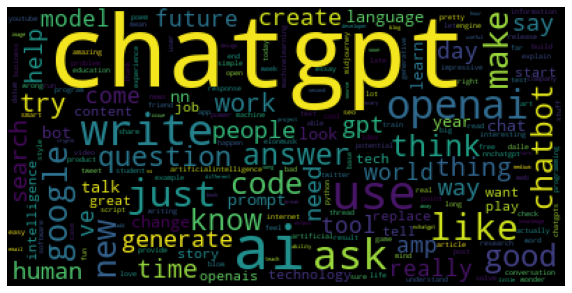

In [6]:
# Apply Count vectorizer
count_vec = CountVectorizer(stop_words='english',analyzer='word',lowercase=True)
count_vec_transform = count_vec.fit_transform(df['tweets'])

# Identify the unique words within each tweet
most_common_words = count_vec.get_feature_names()

# Count the frequency of the unique words
most_common_words_freq = count_vec_transform.sum(axis=0)
most_common_words_freq_int = [int(freq) for freq in most_common_words_freq.tolist()[0]]

# Create a dict to store the corresponding unique word and its frequency
most_common_words_dict = dict(zip(most_common_words,most_common_words_freq_int))

# Visualize most common words
wordcloud = WordCloud().generate_from_frequencies(most_common_words_dict)
fig , ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud)
ax.axis('off')
plt.show()

Vectorizing and spliting data

In [5]:
# x is the feature while y is the target variable
x = df['tweets']
y = df['labels']

# Applying TFID-Vectorizer on tweets
tfid_vec = TfidfVectorizer(stop_words='english',lowercase=True,analyzer='word')
x = tfid_vec.fit_transform(x)

#Spliting data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Modelling

In [8]:
# Naive Bayes metrics
naive_bayes_training_accuracy_score = []
naive_bayes_training_f1_score = []
naive_bayes_testing_accuracy_score = []
naive_bayes_testing_f1_score = []

# Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train,y_train)

# Calculating Naive Bayes metrics
naive_bayes_training_accuracy_score.append(accuracy_score(y_train,naive_bayes.predict(x_train)))
naive_bayes_training_f1_score.append(f1_score(y_train,naive_bayes.predict(x_train),average='weighted'))
naive_bayes_testing_accuracy_score.append(accuracy_score(y_test,naive_bayes.predict(x_test)))
naive_bayes_testing_f1_score.append(f1_score(y_test,naive_bayes.predict(x_test),average='weighted'))

# Results
print(f'The training accuracy is {naive_bayes_training_accuracy_score[0]}')
print(f'The training f1-score is {naive_bayes_training_f1_score[0]}')
print(f'The testing accuracy is {naive_bayes_testing_accuracy_score[0]}')
print(f'The testing f1-score is {naive_bayes_testing_f1_score[0]}')

The training accuracy is 0.7256441158268461
The training f1-score is 0.6878633046044627
The testing accuracy is 0.658468740974935
The testing f1-score is 0.6017129598374745


In [9]:
# Support Vector Machine metrics
svm_training_accuracy_score = []
svm_training_f1_score = []
svm_testing_accuracy_score = []
svm_testing_f1_score = []

# Support Vector Machine model
svm = LinearSVC()
svm.fit(x_train,y_train)

# Calculating Support Vector Machine metrics
svm_training_accuracy_score.append(accuracy_score(y_train,svm.predict(x_train)))
svm_training_f1_score.append(f1_score(y_train,svm.predict(x_train),average='weighted'))
svm_testing_accuracy_score.append(accuracy_score(y_test,svm.predict(x_test)))
svm_testing_f1_score.append(f1_score(y_test,svm.predict(x_test),average='weighted'))

# Results
print(f'The training accuracy is {svm_training_accuracy_score[0]}')
print(f'The training f1-score is {svm_training_f1_score[0]}')
print(f'The testing accuracy score is {svm_testing_accuracy_score[0]}')
print(f'The testing f1-score is {svm_testing_f1_score[0]}')

The training accuracy is 0.9304126901403863
The training f1-score is 0.9289219617584242
The testing accuracy score is 0.7945705209077505
The testing f1-score is 0.7827119772393575


In [10]:
# Decision Tree metrics
decision_tree_training_accuracy_score = []
decision_tree_training_f1_score = []
decision_tree_testing_accuracy_score = []
decision_tree_testing_f1_score = []

# Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

# Calculating Decision Tree metrics
decision_tree_training_accuracy_score.append(accuracy_score(y_train,decision_tree.predict(x_train)))
decision_tree_training_f1_score.append(f1_score(y_train,decision_tree.predict(x_train),average='weighted'))
decision_tree_testing_accuracy_score.append(accuracy_score(y_test,decision_tree.predict(x_test)))
decision_tree_testing_f1_score.append(f1_score(y_test,decision_tree.predict(x_test),average='weighted'))

# Results
print(f'The training accuracy is {decision_tree_training_accuracy_score[0]}')
print(f'The training f1-score is {decision_tree_training_f1_score[0]}')
print(f'The testing accuracy is {decision_tree_testing_accuracy_score[0]}')
print(f'The testing f1-score is {decision_tree_testing_f1_score[0]}')

The training accuracy is 0.998052180710726
The training f1-score is 0.9980517779737806
The testing accuracy is 0.7400477283436441
The testing f1-score is 0.7397591991497702


In [11]:
# K-Nearest Neighbors metrics
k_neighbors_training_accuracy_score = []
k_neighbors_training_f1_score = []
k_neighbors_testing_accuracy_score = []
k_neighbors_testing_f1_score = []

# K-Nearest Neighbors model
number_of_neighbors = [3,6,9,12]
for neighbor in number_of_neighbors:
    k_neighbors = KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski',p=2)
    k_neighbors.fit(x_train,y_train)
    
    # Calculating K-Nearest Neighbors metrics
    k_neighbors_training_accuracy_score.append(accuracy_score(y_train,k_neighbors.predict(x_train)))
    k_neighbors_training_f1_score.append(f1_score(y_train,k_neighbors.predict(x_train),average='weighted'))
    k_neighbors_testing_accuracy_score.append(accuracy_score(y_test,k_neighbors.predict(x_test)))
    k_neighbors_testing_f1_score.append(f1_score(y_test,k_neighbors.predict(x_test),average='weighted'))

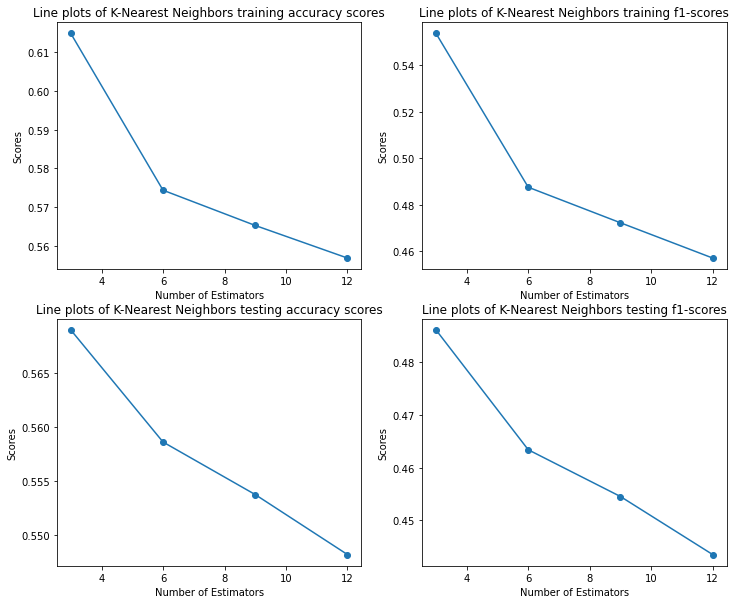

In [12]:
# Line plots of the results
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))
ax1.plot(number_of_neighbors,k_neighbors_training_accuracy_score,linestyle='-',marker='o')
ax2.plot(number_of_neighbors,k_neighbors_training_f1_score,linestyle='-',marker='o')
ax3.plot(number_of_neighbors,k_neighbors_testing_accuracy_score,linestyle='-',marker='o')
ax4.plot(number_of_neighbors,k_neighbors_testing_f1_score,linestyle='-',marker='o')
ax1.set_title('Line plots of K-Nearest Neighbors training accuracy scores')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('Scores')
ax2.set_title('Line plots of K-Nearest Neighbors training f1-scores')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('Scores')
ax3.set_title('Line plots of K-Nearest Neighbors testing accuracy scores')
ax3.set_xlabel('Number of Estimators')
ax3.set_ylabel('Scores')
ax4.set_title('Line plots of K-Nearest Neighbors testing f1-scores')
ax4.set_xlabel('Number of Estimators')
ax4.set_ylabel('Scores')
plt.show()

In [6]:
# Random Forest metrics
random_forest_training_accuracy_score = []
random_forest_training_f1_score = []
random_forest_testing_accuracy_score = []
random_forest_testing_f1_score = []

# Random Forest model
estimators = [10,20,30,40,50,60,70,80]
for estimator in estimators:
    random_forest = RandomForestClassifier(n_estimators=estimator,max_depth=3)
    random_forest.fit(x_train,y_train)
    
    # Calculating Random Forest metrics
    random_forest_training_accuracy_score.append(accuracy_score(y_train,random_forest.predict(x_train)))
    random_forest_training_f1_score.append(f1_score(y_train,random_forest.predict(x_train),average='weighted'))
    random_forest_testing_accuracy_score.append(accuracy_score(y_test,random_forest.predict(x_test)))
    random_forest_testing_f1_score.append(f1_score(y_test,random_forest.predict(x_test),average='weighted'))

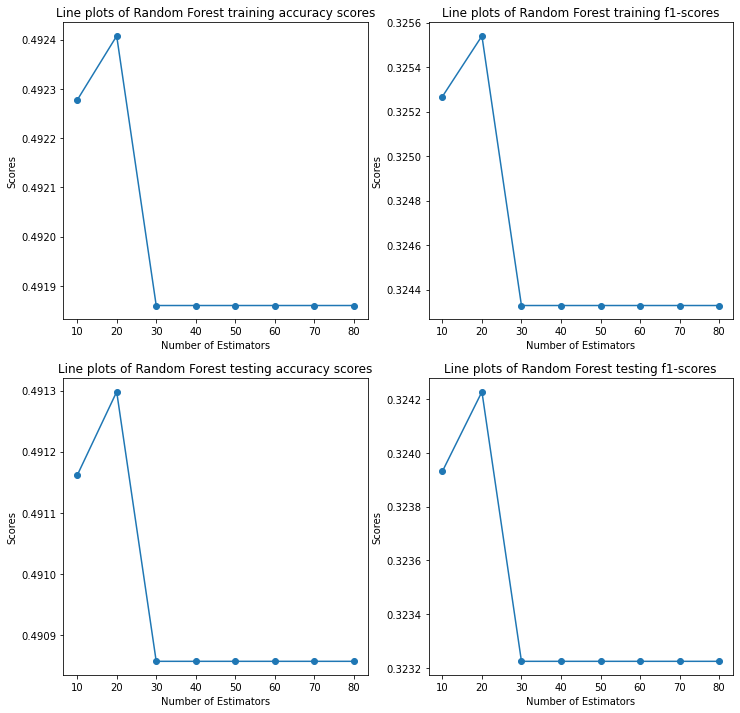

In [7]:
# Line plots of the results
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
ax1.plot(estimators,random_forest_training_accuracy_score,linestyle='-',marker='o')
ax2.plot(estimators,random_forest_training_f1_score,linestyle='-',marker='o')
ax3.plot(estimators,random_forest_testing_accuracy_score,linestyle='-',marker='o')
ax4.plot(estimators,random_forest_testing_f1_score,linestyle='-',marker='o')
ax1.set_title('Line plots of Random Forest training accuracy scores')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('Scores')
ax2.set_title('Line plots of Random Forest training f1-scores')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('Scores')
ax3.set_title('Line plots of Random Forest testing accuracy scores')
ax3.set_xlabel('Number of Estimators')
ax3.set_ylabel('Scores')
ax4.set_title('Line plots of Random Forest testing f1-scores')
ax4.set_xlabel('Number of Estimators')
ax4.set_ylabel('Scores')
plt.show()

In [ ]:
# Gradient Boosting metrics
gradient_boosting_training_accuracy_score = []
gradient_boosting_training_f1_score = []
gradient_boosting_testing_accuracy_score = []
gradient_boosting_testing_f1_score = []

# Gradient Boosting model
for estimator in estimators:
    gradient_boosting = GradientBoostingClassifier(n_estimators=estimator,max_depth=3)
    gradient_boosting.fit(x_train,y_train)
    
    # Calculating Gradient Boosting metrics
    gradient_boosting_training_accuracy_score.append(accuracy_score(y_train,gradient_boosting.predict(x_train)))
    gradient_boosting_training_f1_score.append(f1_score(y_train,gradient_boosting.predict(x_train),average='weighted'))
    gradient_boosting_testing_accuracy_score.append(accuracy_score(y_test,gradient_boosting.predict(x_test)))
    gradient_boosting_testing_f1_score.append(f1_score(y_test,gradient_boosting.predict(x_test),average='weighted'))

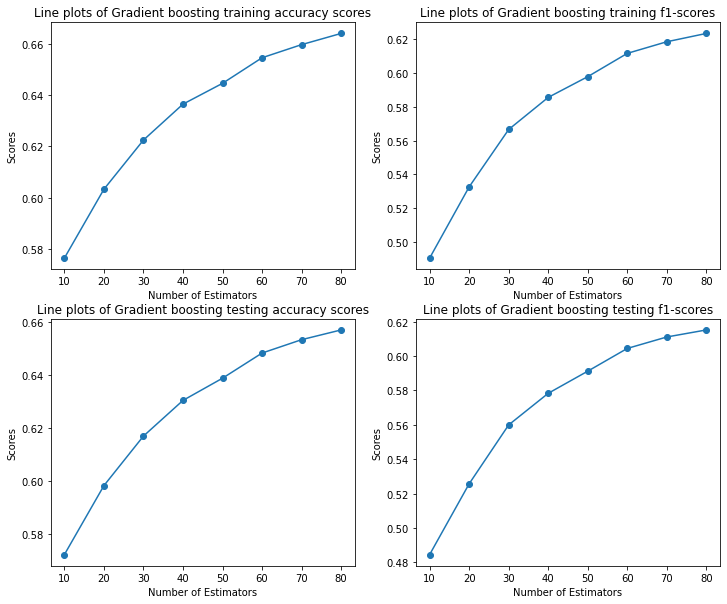

In [17]:
# Line plots of the results
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))
ax1.plot(estimators,gradient_boosting_training_accuracy_score,linestyle='-',marker='o')
ax2.plot(estimators,gradient_boosting_training_f1_score,linestyle='-',marker='o')
ax3.plot(estimators,gradient_boosting_testing_accuracy_score,linestyle='-',marker='o')
ax4.plot(estimators,gradient_boosting_testing_f1_score,linestyle='-',marker='o')
ax1.set_title('Line plots of Gradient boosting training accuracy scores')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('Scores')
ax2.set_title('Line plots of Gradient boosting training f1-scores')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('Scores')
ax3.set_title('Line plots of Gradient boosting testing accuracy scores')
ax3.set_xlabel('Number of Estimators')
ax3.set_ylabel('Scores')
ax4.set_title('Line plots of Gradient boosting testing f1-scores')
ax4.set_xlabel('Number of Estimators')
ax4.set_ylabel('Scores')
plt.show()

Evaluation

In [52]:
# Retrieving the best accuracies achieved
df_evaluation_accuracy = pd.DataFrame({'Model':['Naive Bayes','K-Nearest Neighbors','Support Vector Machines',
                                                'Decision Trees','Random Forest','Gradient Boosting'],
                                      'Training Accuracy':[naive_bayes_training_accuracy_score[0],
                                                           max(k_neighbors_training_accuracy_score),
                                                           svm_training_accuracy_score[0],
                                                          decision_tree_training_accuracy_score[0],
                                                          max(random_forest_training_accuracy_score),
                                                          max(gradient_boosting_training_accuracy_score)],
                                      'Testing Accuracy':[naive_bayes_testing_accuracy_score[0],
                                                         max(k_neighbors_testing_accuracy_score),
                                                         svm_testing_accuracy_score[0],
                                                         decision_tree_testing_accuracy_score[0],
                                                         max(random_forest_testing_accuracy_score),
                                                         max(gradient_boosting_testing_accuracy_score)]})

# Retrieving the best f1-scores achieved
df_evaluation_f1_score = pd.DataFrame({'Model':['Naive Bayes','K-Nearest Neighbors','Support Vector Machines',
                                                'Decision Trees','Random Forest','Gradient Boosting'],
                                      'Training f1-score':[naive_bayes_training_f1_score[0],
                                                          max(k_neighbors_training_f1_score),
                                                          svm_training_f1_score[0],decision_tree_training_f1_score[0],
                                                          max(random_forest_training_f1_score),
                                                          max(gradient_boosting_training_f1_score)],
                                      'Testing f1-score':[naive_bayes_testing_f1_score[0],
                                                         max(k_neighbors_testing_f1_score),
                                                         svm_testing_f1_score[0],decision_tree_testing_f1_score[0],
                                                         max(random_forest_testing_f1_score),
                                                         max(gradient_boosting_testing_f1_score)]})

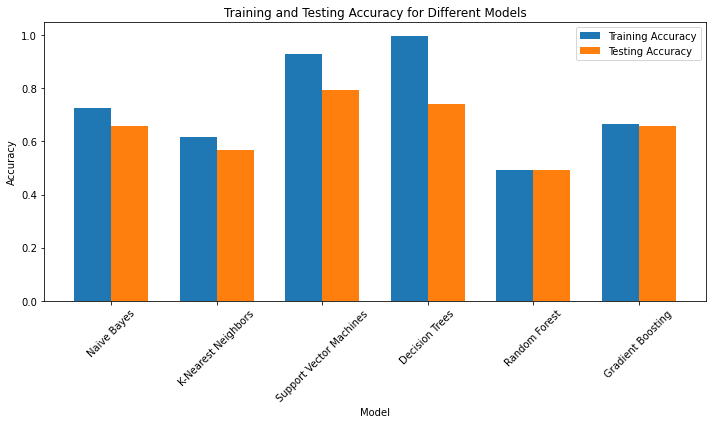

In [53]:
# Plot df_evaluation_accuracy dataframe
plt.figure(figsize=(10, 6))

# Number of models
num_models = len(df_evaluation_accuracy)

# Create a list of indices for the x-axis
x = range(num_models)

# Width of the bars
width = 0.35

# Plot training accuracy bars
plt.bar(x, df_evaluation_accuracy['Training Accuracy'], width, label='Training Accuracy')

# Plot testing accuracy bars
plt.bar([i + width for i in x], df_evaluation_accuracy['Testing Accuracy'], width, label='Testing Accuracy')

# Set the x-axis labels and title
plt.xlabel('Model')
plt.xticks([i + width/2 for i in x], df_evaluation_accuracy['Model'], rotation=45)
plt.title('Training and Testing Accuracy for Different Models')

# Set the y-axis label
plt.ylabel('Accuracy')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

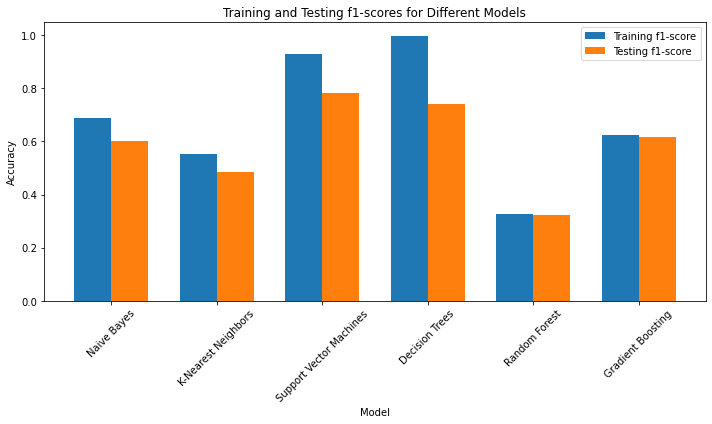

In [54]:
# Plot df_evaluation_f1-score dataframe
plt.figure(figsize=(10, 6))

# Number of models
num_models = len(df_evaluation_f1_score)

# Create a list of indices for the x-axis
x = range(num_models)

# Width of the bars
width = 0.35

# Plot training accuracy bars
plt.bar(x, df_evaluation_f1_score['Training f1-score'], width, label='Training f1-score')

# Plot testing accuracy bars
plt.bar([i + width for i in x], df_evaluation_f1_score['Testing f1-score'], width, label='Testing f1-score')

# Set the x-axis labels and title
plt.xlabel('Model')
plt.xticks([i + width/2 for i in x], df_evaluation_f1_score['Model'], rotation=45)
plt.title('Training and Testing f1-scores for Different Models')

# Set the y-axis label
plt.ylabel('Accuracy')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

Saving model

In [11]:
# Save model
pickle.dump(svm,open('model.pkl','wb'))

# Save vectorizer
pickle.dump(tfid_vec,open('vectorizer.pkl','wb'))